# Unsupervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of unsupervised learning model evaluation.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler
from matplotlib.lines import Line2D
from sklearn.cluster import KMeans
%matplotlib inline

In [5]:
from sklearn import datasets

data = datasets.load_wine()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.Series(data["target"])

## 1. Train a KMeans clustering model on the data set using 8 clusters and compute the silhouette score for the model.

In [13]:
X,y=datasets.make_moons(n_samples=1500, noise=.05)
X=StandardScaler().fit_transform(X)
kmeans=KMeans(n_clusters=8)
clusters = kmeans.fit(X)
y1_pred = kmeans.predict(X)
y = y1_pred

fig, ax=plt.subplots(1,2,figsize=(15,8))
colors=np.array(['blue', 'red','yellow','orange','black','green','gray','brown'])
legend_e=[Line2D([0], [0], color=c, marker='o', linestyle='', label='Clase {}'.format(i)) for i,c in enumerate(colors)]

ax[0].scatter(X[:,0], X[:,1], color=colors[y1_pred]);
ax[0].legend(handles=legend_e, loc='upper right')

print ('Modelo 1: S_SCore={}'.format(silhouette_score(X, y1_pred)))


## 2. Train a KMeans clustering model on the data set using 5 clusters and compute the silhouette score for the model.

Modelo 1: S_SCore=0.4686174379285939


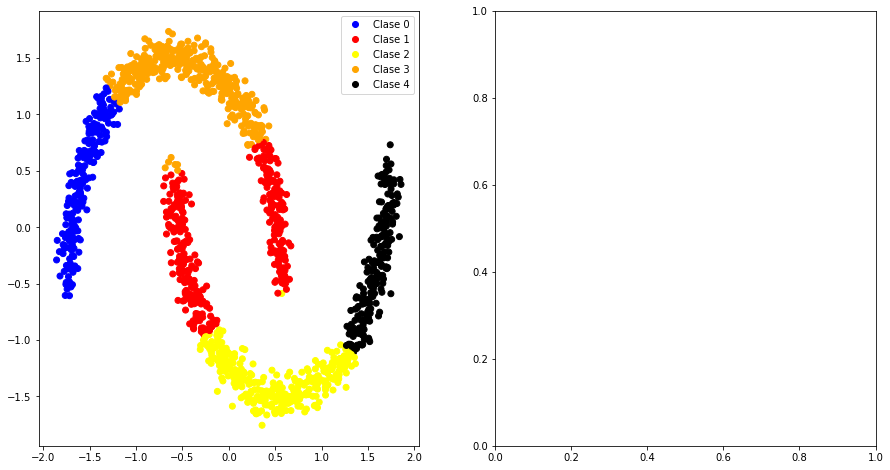

In [15]:
X,y=datasets.make_moons(n_samples=1500, noise=.05)
X=StandardScaler().fit_transform(X)
kmeans=KMeans(n_clusters=5)
clusters = kmeans.fit(X)
y1_pred = kmeans.predict(X)
y = y1_pred

fig, ax=plt.subplots(1,2,figsize=(15,8))
colors=np.array(['blue', 'red','yellow','orange','black'])
legend_e=[Line2D([0], [0], color=c, marker='o', linestyle='', label='Clase {}'.format(i)) for i,c in enumerate(colors)]

ax[0].scatter(X[:,0], X[:,1], color=colors[y1_pred]);
ax[0].legend(handles=legend_e, loc='upper right')

print ('Modelo 1: S_SCore={}'.format(silhouette_score(X, y1_pred)))


## 3. Train a KMeans clustering model on the data set using 3 clusters and compute the silhouette score for the model.

Modelo 1: S_SCore=0.44822893110018713


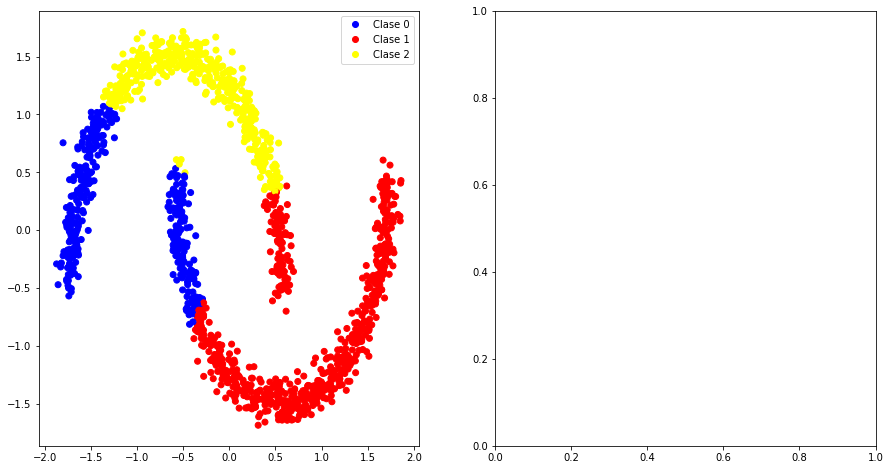

In [16]:
X,y=datasets.make_moons(n_samples=1500, noise=.05)
X=StandardScaler().fit_transform(X)
kmeans=KMeans(n_clusters=3)
clusters = kmeans.fit(X)
y1_pred = kmeans.predict(X)
y = y1_pred

fig, ax=plt.subplots(1,2,figsize=(15,8))
colors=np.array(['blue', 'red','yellow'])
legend_e=[Line2D([0], [0], color=c, marker='o', linestyle='', label='Clase {}'.format(i)) for i,c in enumerate(colors)]

ax[0].scatter(X[:,0], X[:,1], color=colors[y1_pred]);
ax[0].legend(handles=legend_e, loc='upper right')

print ('Modelo 1: S_SCore={}'.format(silhouette_score(X, y1_pred)))


## 4. Use elbow curve visualizations to see if you can determine the best number of clusters to use.

The Yellowbrick library has 3 metrics that you can plot using the `metric` parameter:

- **distortion**: mean sum of squared distances to centers
- **silhouette**: mean ratio of intra-cluster and nearest-cluster distance
- **calinski_harabaz**: ratio of within to between cluster dispersion

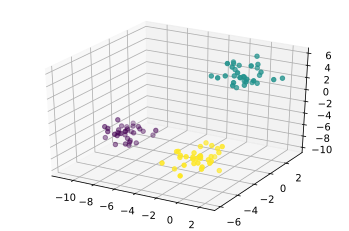

In [24]:
from IPython.display import set_matplotlib_formats
from mpl_toolkits.mplot3d import Axes3D
set_matplotlib_formats('svg')

from sklearn.datasets import make_blobs

X,y=make_blobs(n_features=4, centers=3)

fig=plt.figure()
ax=fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], c=y);

## 5. Try performing the same elbow tests with an AgglomerativeClustering model and compare the results you get to the KMeans results.

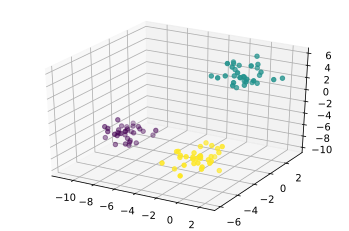

In [28]:
n_clusters, inercia=zip(*[(k, KMeans(n_clusters=k).fit(X).inertia_) for k in range(1,10)])

single=cluster.AgglomerativeClustering(n_clusters=4, linkage='single')
single.fit(X)
y1_pred=single.labels_

fig=plt.figure()
ax=fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], c=y);


## 6. Create and plot a scatter matrix showing how the clusters are grouped across all the different combinations of variables in the data.

Use the model and number of clusters that returned the best result above.

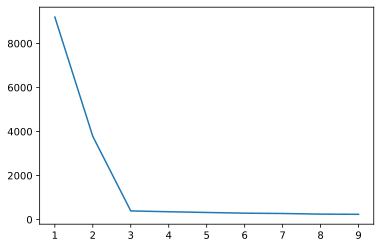

In [29]:
n_clusters, inercia=zip(*[(k, KMeans(n_clusters=k).fit(X).inertia_) for k in range(1,10)])

fig=plt.figure()
ax=fig.add_subplot()
ax.plot(n_clusters, inercia);

## 7. Apply a PCA transform and plot the first two principle components with the plot point colors determined by cluster.

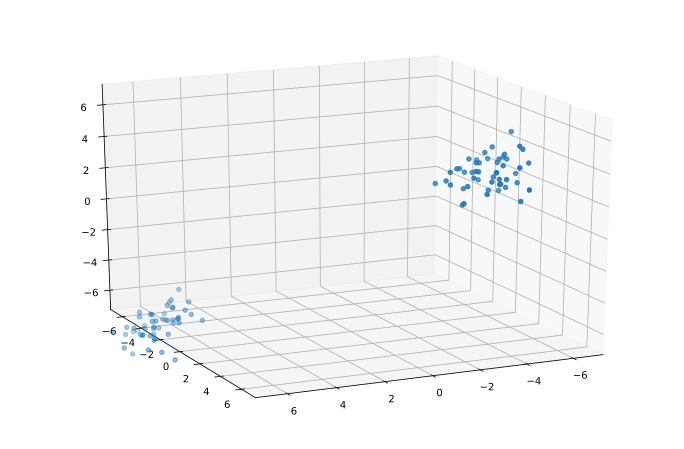

In [35]:
from sklearn.datasets import make_blobs
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial.transform import Rotation as R

X, _ = make_blobs( n_features=2, centers=2, cluster_std=1.0)

X = np.c_[X, 0.5 * np.random.randn(X.shape[0], 1)]

rot = R.from_euler('y', 45, degrees=True)
X = rot.apply(X)

fig = plt.figure(figsize=(12, 8))
ax = fig.gca(projection='3d')

ax.scatter(X[:, 0], X[:, 1], X[:, 2])
ax.set_xlim(-7, 7)
ax.set_ylim(-7, 7)
ax.set_zlim(-7, 7)

ax.view_init(elev=20, azim=65)
plt.show();

## 8. Generate a series of t-SNE plots showing the clusters at a variety of perplexities.

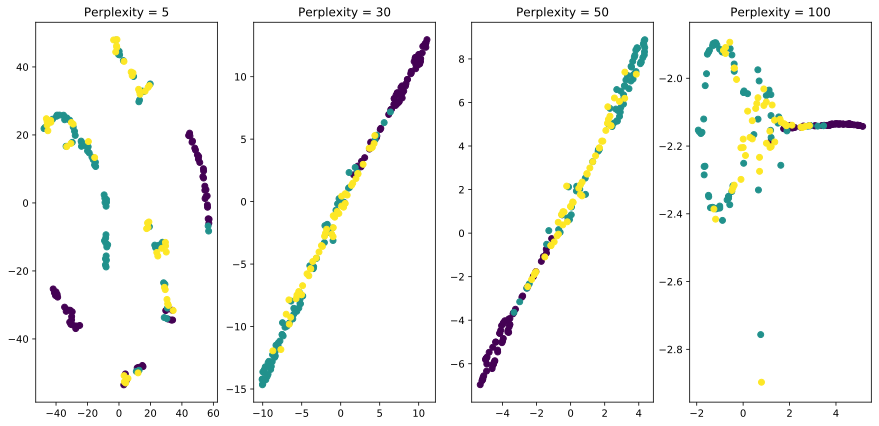

In [36]:
from sklearn.manifold import TSNE

X, y = datasets.load_wine(return_X_y=True)

fig, ax = plt.subplots(1, 4, figsize=(15, 7))
for i, perp in enumerate([5, 30, 50, 100]):
    tsne = TSNE(perplexity=perp)
    x_embedded = tsne.fit_transform(X)
    ax[i].scatter(x_embedded[:, 0], x_embedded[:, 1], c=y)
    ax[i].set_title("Perplexity = {}".format(perp))
    
plt.show();